# Transition Path Estimation for Conesa & Krueger

Text(0.5, 1.0, 'Age-efficiency profile')

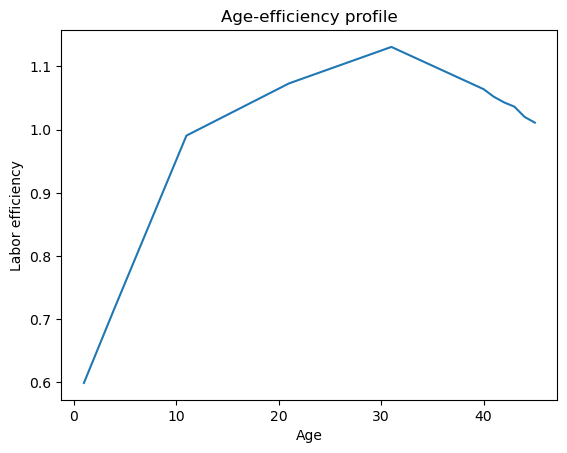

In [1]:
from EGM_ss import OLGModel, HH_egm, steady_dist_egm, market_clearing
import numpy as np
import matplotlib.pyplot as plt
import time

# read in ef.txt as a numpy array
ef = np.loadtxt('ef.txt', delimiter=',')

# plot ef across [1, .., len(ef)]
x = np.arange(1, len(ef)+1)
plt.plot(x, ef)
plt.xlabel('Age')
plt.ylabel('Labor efficiency')
plt.title('Age-efficiency profile')

In [5]:
# baseline for steady state
og = OLGModel(eta=ef, na=200, gamma=2.5, a_min=10e-8, a_max=25.0, z_grid=np.array([1.0, .25]))

start = time.time()
K_ss, L_ss, r_ss, w_ss, b_ss = market_clearing(og, tol=1e-5, max_iter=1000, rho=.5)
end = time.time()
print('Time elapsed: ', round(end-start, 5))
print('K: ', round(K_ss, 5))
print('L: ', round(L_ss, 5))
print('r: ', round(r_ss, 5))
print('w: ', round(w_ss, 5))
print('b: ', round(b_ss, 5))

Converged in 14 iterations
Time elapsed:  0.06006
K:  2.49598
L:  0.28754
r:  0.03029
w:  1.39333
b:  0.18064


In [6]:
a_w, a_r, c_w, c_r, l_w = HH_egm(og, r_ss, w_ss, b_ss)

In [7]:
from EGM_TPI import HH_egm_transition, iterate_dist

r_vec = r_ss * np.ones(og.N)
w_vec = w_ss * np.ones(og.N)
b_vec = b_ss * np.ones(og.N)

aw_tran, ar_tran, cw_tran, cr_tran, lw_tran = HH_egm_transition(og, r_vec, w_vec, b_vec)

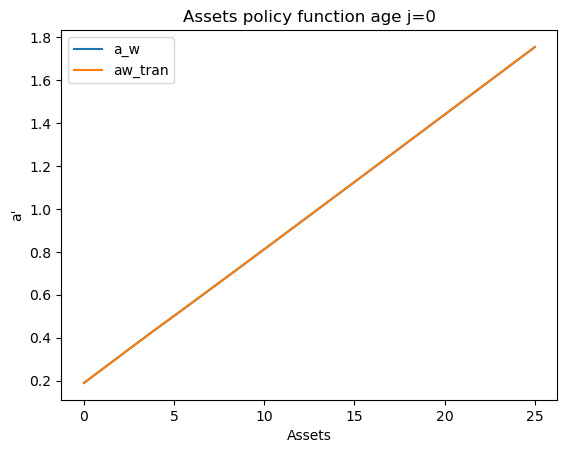

In [8]:
j = 0
# compare a_w and aw_tran
plt.plot(og.a_grid, c_w[j-1, 1, :], label='a_w')
plt.plot(og.a_grid, cw_tran[j-1, 1, :], label='aw_tran')
plt.xlabel('Assets')
plt.ylabel('a\'')
plt.title(f'Assets policy function age j={j}')
plt.legend()


In [9]:
h_w_ss, h_r_ss = steady_dist_egm(og, a_w, a_r)

h_w_update, h_r_update = iterate_dist(og, h_w_ss, h_r_ss, aw_tran, ar_tran)

In [15]:
# find the error between h_w_ss and h_w_update
error = np.max(np.abs(h_w_ss - h_w_update))
error

0.0001358267361478236

In [16]:
error = np.max(np.abs(h_r_ss - h_r_update))
error

0.00021070107737616005

Text(0.5, 1.0, 'Distribution of agents by assets')

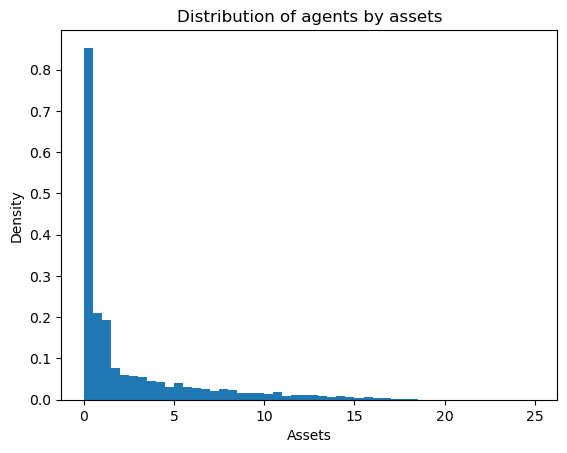

In [13]:
h_w_collapsed_ss = np.sum(h_w_ss, axis=(0, 2))
h_r_collapsed_ss = np.sum(h_r_ss, axis=0)
h_collapsed_ss = h_w_collapsed_ss + h_r_collapsed_ss

plt.hist(og.a_grid, weights=h_collapsed_ss, bins=50, density=True)
plt.xlabel('Assets')
plt.ylabel('Density')
plt.title('Distribution of agents by assets')

Text(0.5, 1.0, 'Distribution of agents by assets')

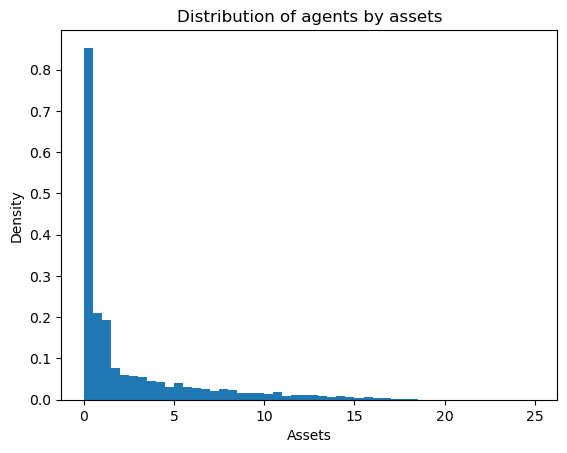

In [14]:
h_w_collapsed_update = np.sum(h_w_update, axis=(0, 2))
h_r_collapsed_update = np.sum(h_r_update, axis=0)
h_collapsed_update = h_w_collapsed_update + h_r_collapsed_update

plt.hist(og.a_grid, weights=h_collapsed_update, bins=50, density=True)
plt.xlabel('Assets')
plt.ylabel('Density')
plt.title('Distribution of agents by assets')